# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# pip install citipy

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from nithiya_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "nithiya_output_data/cities.csv"

In [42]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Change back to 1500 after basic testing
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

In [51]:
cities

['longyearbyen',
 'louisbourg',
 'manta',
 'fairbanks',
 'victoria',
 'tura',
 'peniche',
 'carnarvon',
 'springbok',
 'illoqqortoormiut',
 'jamestown',
 'punta arenas',
 'tsihombe',
 'shingu',
 'tibati',
 'pundaguitan',
 'sisimiut',
 'sao paulo de olivenca',
 'nikolskoye',
 'bluff',
 'rikitea',
 'ushuaia',
 'cherskiy',
 'karlskrona',
 'kurilsk',
 'waingapu',
 'bengkulu',
 'butaritari',
 'wattegama',
 'campbellsville',
 'kodiak',
 'mataura',
 'taolanaro',
 'cartagena',
 'vardo',
 'presidente olegario',
 'camacha',
 'yellowknife',
 'castro',
 'namibe',
 'albany',
 'ahipara',
 'busselton',
 'buin',
 'pevek',
 'juneau',
 'salalah',
 'hithadhoo',
 'ankang',
 'dudinka',
 'karkaralinsk',
 'grand river south east',
 'togur',
 'olafsvik',
 'kavaratti',
 'umm lajj',
 'hunza',
 'avera',
 'port alfred',
 'havelock',
 'aberdeen',
 'yichang',
 'haifa',
 'khatanga',
 'kapaa',
 'kamachumu',
 'tahoua',
 'sistranda',
 'berdigestyakh',
 'sumbe',
 'esperance',
 'mys shmidta',
 'hobart',
 'airai',
 'puert

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URLx
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=ab0436d4ad4aaccb31bc1903d6af96b9&units=imperial&q=


In [39]:
response = requests.get(query_url + 'mar del plata').json()
print(response)

{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.13, 'feels_like': 40.3, 'temp_min': 39.22, 'temp_max': 42.13, 'pressure': 1026, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1623930179, 'sys': {'type': 2, 'id': 264934, 'country': 'AR', 'sunrise': 1623927922, 'sunset': 1623962224}, 'timezone': -10800, 'id': 3430863, 'name': 'Mar del Plata', 'cod': 200}


In [53]:
# set up lists to hold reponse info
city_name = []
lat = []
lon = []
temp = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    print(f"city in: {city}")
    
    try:
#         get the country, date here and divide into set of 50 cities
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])

    except:
        print(f"The cities is not found")
#         print(f"The latitude information received is: {lat}")
#         print(f"The temperature information received is: {temp}")
#         print(f"The max temperature information received is: {temp_max}")
#         print(f"The longitude information received is: {lon}")
#         print(f"The humidity information received is: {humidity}")
#         print(f"The cloudiness information received is: {cloudiness}")
#         print(f"The wind speed information received is: {wind_speed}")
        
        pass

city in: longyearbyen
city in: louisbourg
The cities is not found
city in: manta
city in: fairbanks
city in: victoria
city in: tura
city in: peniche
city in: carnarvon
city in: springbok
city in: illoqqortoormiut
The cities is not found
city in: jamestown
city in: punta arenas
city in: tsihombe
The cities is not found
city in: shingu
city in: tibati
city in: pundaguitan
city in: sisimiut
city in: sao paulo de olivenca
city in: nikolskoye
city in: bluff
city in: rikitea
city in: ushuaia
city in: cherskiy
city in: karlskrona
city in: kurilsk
city in: waingapu
city in: bengkulu
city in: butaritari
city in: wattegama
city in: campbellsville
city in: kodiak
city in: mataura
city in: taolanaro
The cities is not found
city in: cartagena
city in: vardo
city in: presidente olegario
city in: camacha
city in: yellowknife
city in: castro
city in: namibe
city in: albany
city in: ahipara
city in: busselton
city in: buin
city in: pevek
city in: juneau
city in: salalah
city in: hithadhoo
city in: anka

city in: lolua
The cities is not found
city in: port lincoln
city in: yaan
city in: saurimo
city in: guerrero negro
city in: koutsouras
city in: tateyama
city in: shimoda
city in: zhezkazgan
city in: igarka
city in: flinders
city in: rach gia
city in: bundi
city in: novikovo
city in: kidal
city in: novi
city in: texarkana
city in: shelburne
city in: clearlake
city in: auki
city in: culpeper
city in: mogadishu
city in: goderich
city in: albert lea
city in: fare
city in: kurumkan
city in: acapulco
city in: aguas verdes
city in: labuhan
city in: redmond
city in: pochutla
city in: talnakh
city in: tjome
city in: tilichiki
city in: caiaponia
city in: lebedinyy
city in: yen bai
city in: sorvag
The cities is not found
city in: puerto del rosario
city in: amderma
The cities is not found
city in: broome
city in: balclutha
city in: umm ruwabah
The cities is not found
city in: santana
city in: punuare
city in: coari
city in: gallup
city in: koungou
city in: paradwip
The cities is not found
city i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
len()

0

In [54]:
# create a data frame from cities, lat, and temp
city_dict = {
    "city": city_name,
    "lat": lat,
    "long": lon,
    "temp": temp,
    "temp_max": temp_max,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed
}
city_data_df = pd.DataFrame(city_dict)
city_data_df

# pd.DataFrame(dict([(k,pd.Series(v)) for k,v in city_data_df.items()])).dropna()

,city,lat,long,temp,temp_max,humidity,cloudiness,wind speed
0,Longyearbyen,78.2186,15.6401,40.84,40.84,65,75,13.80
1,Manta,-0.9500,-80.7333,73.18,73.18,88,90,6.91
2,Fairbanks,64.8378,-147.7164,54.34,58.82,88,20,1.01
3,Hong Kong,22.2855,114.1577,87.71,89.33,76,23,1.01
4,Tura,25.5198,90.2201,75.83,75.83,95,82,8.21
...,...,...,...,...,...,...,...,...
583,Egvekinot,66.3167,-179.1667,34.16,34.16,92,97,3.60
584,Tuktoyaktuk,69.4541,-133.0374,35.28,35.28,89,100,5.97
585,Dzilam González,21.2833,-88.9333,74.01,74.01,97,100,7.90
586,Santa Cruz del Sur,20.7147,-77.9956,78.57,78.57,85,64,7.52


In [10]:
# Output to csv file
city_data_df.to_csv("nithiya_output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Today's date: 2021-06-17


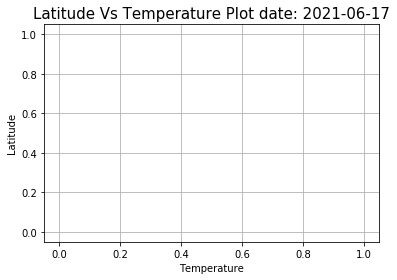

In [13]:
# Create a Scatter Plot for temperature vs latitude
from datetime import date

today = date.today()
print("Today's date:", today)
x_values = city_data_df['temp']
y_values = city_data_df['lat']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="purple")
# plt.plot(x_values,regress_values,"b-")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title(f'Latitude Vs Temperature Plot date: {today}', 
          fontsize=15)
plt.grid(True)
# plt.annotate(line_eq, xy=(20, 40), 
#              xycoords='data',xytext=(0.8, 0.95), 
#              textcoords='axes fraction',horizontalalignment='right', 
#              verticalalignment='top',fontsize=12,color="blue")
# print(f"The r-squared is: {rvalue**2}")

# plt.savefig("./nithiya_output_data/lat vs temp.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Humidity Plot

Today's date: 2021-06-17


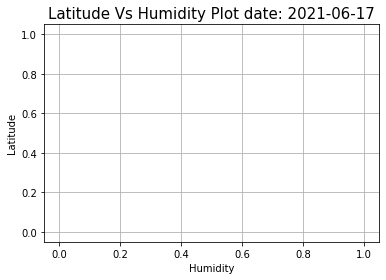

In [14]:
# Create a Scatter Plot for humidity vs latitude
from datetime import date

today = date.today()
print("Today's date:", today)
x_values = city_data_df['humidity']
y_values = city_data_df['lat']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values, color="purple")
# plt.plot(x_values,regress_values,"b-")
plt.scatter(x_values,y_values, color='maroon')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title(f'Latitude Vs Humidity Plot date: {today}', 
          fontsize=15)
plt.grid(True)
# plt.annotate(line_eq, xy=(20, 40), 
#              xycoords='data',xytext=(0.8, 0.95), 
#              textcoords='axes fraction',horizontalalignment='right', 
#              verticalalignment='top',fontsize=12,color="blue")
# print(f"The r-squared is: {rvalue**2}")
# plt.savefig("./nithiya_output_data/lat vs humidity.png", bbox_inches = "tight")

plt.show()

## Latitude vs. Cloudiness Plot

Today's date: 2021-06-17


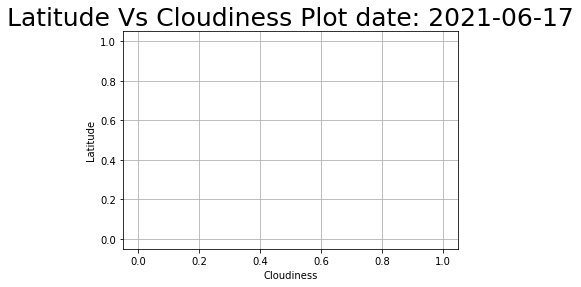

In [15]:
# Create a Scatter Plot for temperature vs latitude
from datetime import date

today = date.today()
print("Today's date:", today)
x_values = city_data_df['cloudiness']
y_values = city_data_df['lat']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values, color="purple")
# plt.plot(x_values,regress_values,"b-")
plt.scatter(x_values,y_values, color='grey')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title(f'Latitude Vs Cloudiness Plot date: {today}', 
          fontsize=25)
plt.grid(True)
# plt.annotate(line_eq, xy=(20, 40), 
#              xycoords='data',xytext=(0.8, 0.95), 
#              textcoords='axes fraction',horizontalalignment='right', 
#              verticalalignment='top',fontsize=12,color="blue")
# print(f"The r-squared is: {rvalue**2}")
# plt.savefig("./nithiya_output_data/lat vs cloudiness.png", bbox_inches = "tight")

plt.show()

## Latitude vs. Wind Speed Plot

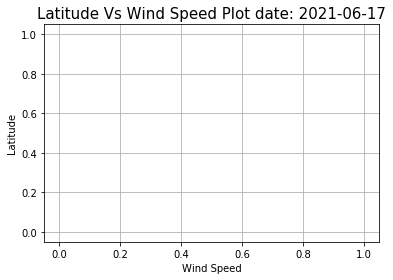

In [16]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['wind speed']
y_values = city_data_df['lat']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values, color="purple")
# plt.plot(x_values,regress_values,"b-")
plt.scatter(x_values,y_values, color='green')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title(f'Latitude Vs Wind Speed Plot date: {today}', 
          fontsize=15)
plt.grid(True)
# plt.annotate(line_eq, xy=(20, 40), 
#              xycoords='data',xytext=(0.8, 0.95), 
#              textcoords='axes fraction',horizontalalignment='right', 
#              verticalalignment='top',fontsize=12,color="blue")
# print(f"The r-squared is: {rvalue**2}")
# plt.savefig("./nithiya_output_data/lat vs wind speed.png", bbox_inches = "tight")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
north_hemisphere = city_data_df.loc[(city_data_df['lat'] >= 0)]
north_hemisphere

,city,lat,long,temp,temp_max,humidity,cloudiness,wind speed


In [18]:
south_hemisphere = city_data_df.loc[(city_data_df['lat'] <= 0)]
south_hemisphere

,city,lat,long,temp,temp_max,humidity,cloudiness,wind speed


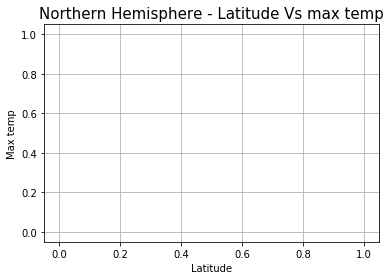

In [19]:
# Create a Scatter Plot for max temperature vs latitude
x_values = north_hemisphere['lat']
y_values = north_hemisphere['temp_max']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_values,regress_values,"b-")
plt.scatter(x_values,y_values, color='green')
plt.xlabel('Latitude')
plt.ylabel('Max temp')
plt.title(f'Northern Hemisphere - Latitude Vs max temp', 
          fontsize=15)
plt.grid(True)
# plt.annotate(line_eq, xy=(20, 40), 
#              xycoords='data',xytext=(0.8, 0.95), 
#              textcoords='axes fraction',horizontalalignment='right', 
#              verticalalignment='top',fontsize=12,color="blue")
# print(f"The r-squared is: {rvalue**2}")
plt.savefig("./nithiya_output_data/north_hemi-lat vs max temp.png", bbox_inches = "tight")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

NameError: name 'regress_values' is not defined

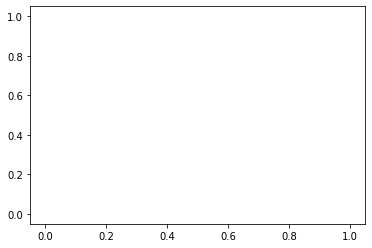

In [20]:
# Create a Scatter Plot for max temperature vs latitude
x_values = south_hemisphere['temp_max']
y_values = south_hemisphere['lat']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="purple")
plt.plot(x_values,regress_values,"b-")
plt.xlabel('Max temp')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere - Latitude Vs max temp', 
          fontsize=15)
plt.grid(True)
# plt.annotate(line_eq, xy=(20, 40), 
#              xycoords='data',xytext=(0.8, 0.95), 
#              textcoords='axes fraction',horizontalalignment='right', 
#              verticalalignment='top',fontsize=12,color="blue")
# print(f"The r-squared is: {rvalue**2}")
plt.savefig("./nithiya_output_data/south_hemi-lat vs max temp.png", bbox_inches = "tight")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Create a Scatter Plot for humidity vs latitude
x_values = north_hemisphere['lat']
y_values = north_hemisphere['humidity']
plt.scatter(x_values,y_values, color='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere - Latitude Vs Humidity', 
          fontsize=15)
plt.grid(True)
plt.savefig("./nithiya_output_data/north_hemi-lat vs humidity.png", bbox_inches = "tight")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Create a Scatter Plot for humidity vs latitude
x_values = south_hemisphere['lat']
y_values = south_hemisphere['humidity']
plt.scatter(x_values,y_values, color='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere - Latitude Vs Humidity', 
          fontsize=15)
plt.grid(True)
plt.savefig("./nithiya_output_data/south_hemi-lat vs humidity.png", bbox_inches = "tight")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Create a Scatter Plot for Cloudiness vs latitude
x_values = north_hemisphere['lat']
y_values = north_hemisphere['cloudiness']
plt.scatter(x_values,y_values, color='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere - Latitude Vs Cloudiness', 
          fontsize=15)
plt.grid(True)
plt.savefig("./nithiya_output_data/north_hemi-lat vs cloudiness.png", bbox_inches = "tight")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = south_hemisphere['lat']
y_values = south_hemisphere['humidity']
plt.scatter(x_values,y_values, color='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere - Latitude Vs Cloudiness', 
          fontsize=15)
plt.grid(True)
plt.savefig("./nithiya_output_data/south_hemi-lat vs humidity.png", bbox_inches = "tight")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Create a Scatter Plot for Wind speed vs latitude
x_values = north_hemisphere['lat']
y_values = north_hemisphere['wind_speed']
plt.scatter(x_values,y_values, color='green')
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
plt.title(f'Northern Hemisphere - Latitude Vs Wind Speed', 
          fontsize=15)
plt.grid(True)
plt.savefig("./nithiya_output_data/north_hemi-lat vs wind_speed.png", bbox_inches = "tight")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Create a Scatter Plot for wind speed vs latitude
x_values = south_hemisphere['lat']
y_values = south_hemisphere['wind_speed']
plt.scatter(x_values,y_values, color='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere - Latitude Vs Wind Speed', 
          fontsize=15)
plt.grid(True)
plt.savefig("./nithiya_output_data/south_hemi-lat vs wind_speed.png", bbox_inches = "tight")

plt.show()